# Example 5 - Inclined Layers cut by Fault

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 2978 m wide (W-E extent) and 3728 m high (N-S extent). 

The table below shows the result of a drilling campaign carried out at 5 different points (A-F). For Coal1, the base of the layer is noted. For a sand layer the whole segment is noted. A second coal seam was only encountered at locations B, C and D. The numbers in meter indicate where layer boundaries where encountered below the surface. 

|      | A    | B    | C    | D    | E    | F    |
|------|------|------|------|------|------|------|
|Coal1 |100 m | 50 m | 50 m | 50 m | 150 m| 250 m|
| Sand |100-130 m | 50-100 m | 50-100 m | 50-100 m | 150-220 m| 250-300 m| 
|Coal2 |?     | 100 m| 100 m| 100 m|     ?|     ?|


Coal seam 1 is already outcropping in the area and partial layer boundaries and orientation measurements are provided. Coal seam 2 was not found at locations E and F nor at the surface. The indicated line marks custom section number 1. 


<img src="../../../gemgis/data/examples/example5/task5.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

The data is loaded as for the previous example. However, orientations are not loaded as these will be calculated by available strike lines as shown in the tutorials. 

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example5/task5.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example5/interfaces5_lines.shp')
# orientations = gpd.read_file('../../../gemgis/data/examples/example5/orientations5.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example5/extent5.shp')
# geological_map = gpd.read_file('../../../gemgis/data/examples/example5/geolmap5.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example5/topo5.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example5/customsections5.shp')

# Inspect Data

In [3]:
interfaces.head()

,id,formation,geometry
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573..."
1,None,Coal1,"LINESTRING (1456.629 1043.919, 1456.629 1043.9..."


In [4]:
extent.head()

,id,geometry
0,None,"POLYGON ((0.000 0.000, 0.000 3728.000, 2978.00..."


In [5]:
topo.head()

,id,Z,geometry
0,None,200,"LINESTRING (151.591 8.547, 227.032 59.217, 273..."
1,None,100,"LINESTRING (2174.989 10.799, 2161.477 34.445, ..."
2,None,150,"LINESTRING (1870.409 4.043, 1860.838 33.882, 1..."
3,None,250,"LINESTRING (1998.772 1855.165, 2031.425 1825.8..."
4,None,150,"LINESTRING (2977.254 2515.556, 2959.238 2525.1..."


# Create GemPy Data Class

In [6]:
geo_data = gg.GemPyData(model_name='Model5', 
                        crs='EPSG:4326')

In [7]:
vars(geo_data)

{'model_name': 'Model5',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [8]:
geo_data.set_extent(gdf=extent, minz=-200, maxz=500)
geo_data.extent

[0.0, 2978.0, 0.0, 3728.0, -200, 500]

# Set Resolution

In [9]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

# Plot Data

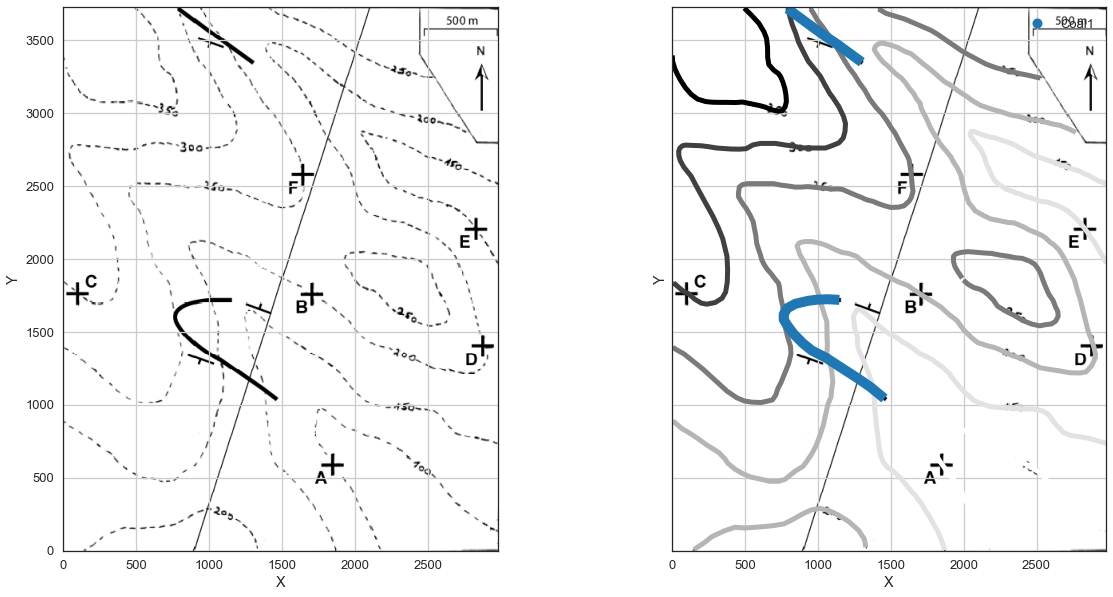

In [10]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4])
# Plotting the different elements on the geological map
# geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [11]:
topo

,id,Z,geometry
0,None,200,"LINESTRING (151.591 8.547, 227.032 59.217, 273..."
1,None,100,"LINESTRING (2174.989 10.799, 2161.477 34.445, ..."
2,None,150,"LINESTRING (1870.409 4.043, 1860.838 33.882, 1..."
3,None,250,"LINESTRING (1998.772 1855.165, 2031.425 1825.8..."
4,None,150,"LINESTRING (2977.254 2515.556, 2959.238 2525.1..."
5,None,350,"LINESTRING (496.143 3720.925, 546.812 3670.255..."
6,None,250,"LINESTRING (1416.074 3715.295, 1467.869 3684.8..."
7,None,300,"LINESTRING (793.403 3720.925, 805.789 3672.507..."
8,None,250,"LINESTRING (5.213 1394.637, 33.362 1376.621, 8..."
9,None,200,"LINESTRING (2768.384 2869.679, 2719.966 2893.3..."


In [12]:
dem = gg.vector.interpolate_raster(topo, method='rbf', n= 100, seed=4)
dem

array([[240.69635946, 240.62197508, 240.54764522, ..., 108.43847005,
        108.48115938, 108.52422594],
       [240.66087212, 240.58646119, 240.51210483, ..., 108.37070788,
        108.41345613, 108.45658439],
       [240.62540871, 240.55097115, 240.47658822, ..., 108.30300049,
        108.34580787, 108.38899807],
       ...,
       [381.70112378, 381.65628254, 381.61144009, ..., 276.1745446 ,
        276.17959256, 276.18467985],
       [381.74102983, 381.69614096, 381.65125077, ..., 276.25882369,
        276.26388205, 276.26897969],
       [381.78091328, 381.73597678, 381.69103884, ..., 276.34307828,
        276.34814709, 276.35325511]])

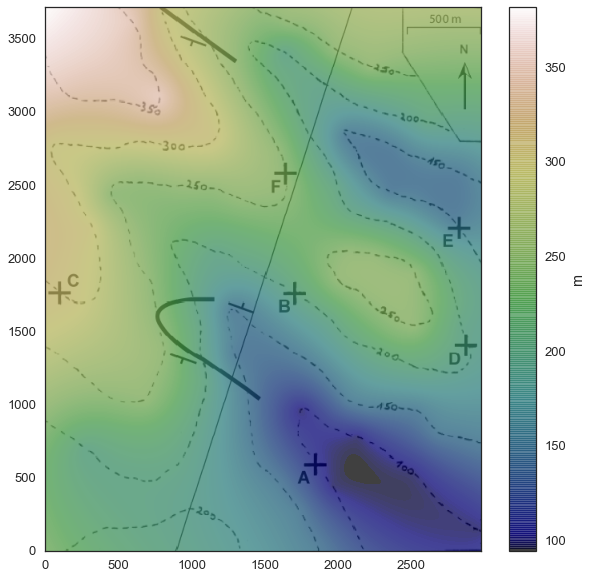

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(np.flipud(base_map.read(1)), origin='lower',
           cmap='gray', extent=geo_data.extent[:4])
im = plt.imshow(dem, origin='lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [14]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example5/topo.tif',dem, crs='EPSG:4326', extent=[0,765,0,1000])

In [15]:
topography = rasterio.open('../../../gemgis/data/examples/example5/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example5/topo.tif' mode='r'>

# Set Interfaces

In [16]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=geo_data.extent)
interfaces_coords.head()

,id,formation,geometry,points,X,Y,Z
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(792.0159136742865, 3717.573390174757)",792.015914,3717.573390,305.398624
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(792.0159136742865, 3717.573390174757)",792.015914,3717.573390,305.398624
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(921.2228614389301, 3622.1460365969483)",921.222861,3622.146037,290.566879
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(1030.1620526914726, 3542.7639902578862)",1030.162053,3542.763990,281.606181
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(1139.945733798686, 3468.4488830468495)",1139.945734,3468.448883,271.427283


In [17]:
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces

,index,X,Y,Z,formation
0,0,792.015914,3717.573390,305.398624,Coal1
1,0,792.015914,3717.573390,305.398624,Coal1
2,0,921.222861,3622.146037,290.566879,Coal1
3,0,1030.162053,3542.763990,281.606181,Coal1
4,0,1139.945734,3468.448883,271.427283,Coal1
5,0,1301.243296,3350.220303,252.960597,Coal1
6,0,1301.243296,3350.220303,252.960597,Coal1
7,1,1456.629429,1043.918510,139.798667,Coal1
8,1,1456.629429,1043.918510,139.798667,Coal1
9,1,1359.513096,1123.300557,152.267420,Coal1


# Set Orientations

As orientations were not loaded, they have to be calculated based on strike lines provided for the lithological layers and the fault. 

## Load Fault Data and Calculate Orientations

In [18]:
strike = gpd.read_file(
    '../../../gemgis/data/examples/example5/lines5_strike.shp')
strike

,id,Z,formation,geometry
0,7,0,Coal1,"LINESTRING (1642.839 2582.579, 2829.348 2205.937)"
1,6,150,Coal1,"LINESTRING (1705.332 1759.201, 2875.795 1406.768)"
2,5,200,Coal1,"LINESTRING (1017.766 1722.234, 2979.938 1137.003)"
3,4,250,Coal1,"LINESTRING (99.956 1763.424, 765.837 1620.705,..."
4,3,200,Coal1,"LINESTRING (1078.147 1313.501, 2963.048 752.760)"
5,2,150,Coal1,"LINESTRING (1387.230 1097.312, 2968.115 619.330)"
6,1,0,Coal1,"LINESTRING (1152.462 806.807, 2966.426 249.444)"
7,8,250,Coal1,"LINESTRING (1103.482 3493.974, 2974.871 2872.429)"


In [30]:
gdf = strike[strike['id']<3]
gdf = gg.vector.extract_xy(gdf)
gdf

,id,Z,formation,geometry,points,X,Y
5,2,150,Coal1,"LINESTRING (1387.230 1097.312, 2968.115 619.330)","(1387.2303541244798, 1097.311602547661)",1387.230354,1097.311603
5,2,150,Coal1,"LINESTRING (1387.230 1097.312, 2968.115 619.330)","(2968.1153620683535, 619.3303448039474)",2968.115362,619.330345
6,1,0,Coal1,"LINESTRING (1152.462 806.807, 2966.426 249.444)","(1152.4621745259772, 806.8070925408806)",1152.462175,806.807093
6,1,0,Coal1,"LINESTRING (1152.462 806.807, 2966.426 249.444)","(2966.4263823590127, 249.4437884581041)",2966.426382,249.443788


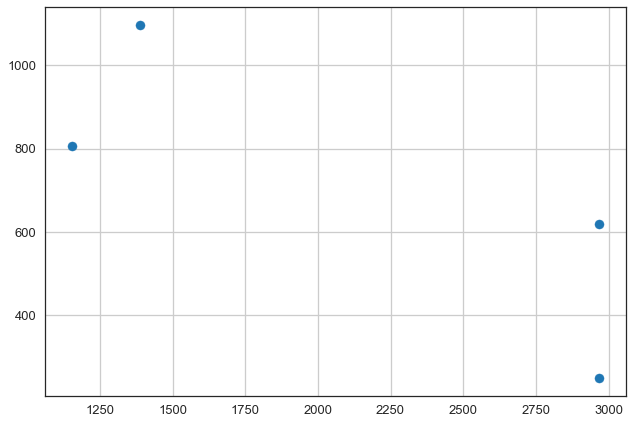

In [32]:
plt.scatter(gdf.X, gdf.Y)
plt.grid()

In [55]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


X = np.array([[1387.230354, 1097.311603], [2968.115362, 619.330345]])
Y = np.array([1152.462175, 806.807093]).reshape(1, -1)
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(Y)
distances, indices = nbrs.kneighbors(X)


distances

array([[ 373.50899347],
       [1825.30655686]])

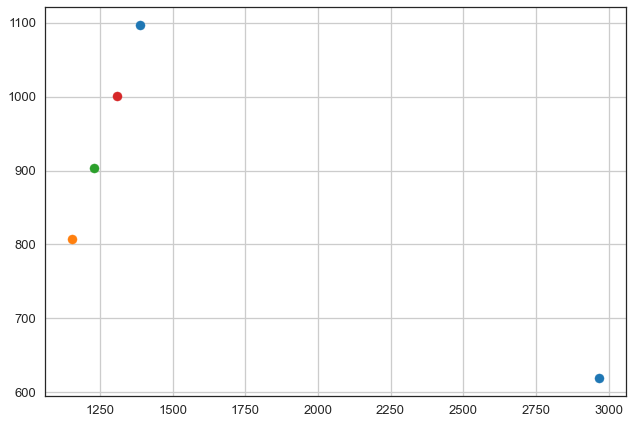

In [61]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])

plt.scatter((1/3*1387.230354+2/3*1152.462175),
            (1/3*1097.311603+2/3*806.807093))
plt.scatter((2/3*1387.230354+1/3*1152.462175),
            (2/3*1097.311603+1/3*806.807093))
plt.grid()

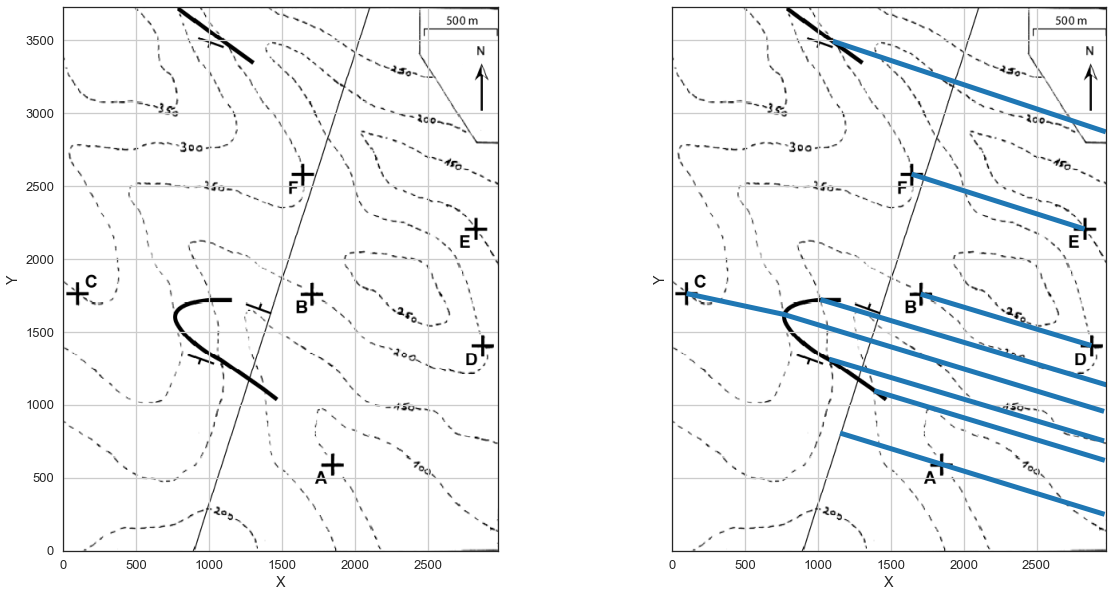

In [19]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray',extent=geo_data.extent[:4])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray',extent=geo_data.extent[:4])
# Plotting the different elements on the geological map

# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
strike.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

In [28]:
def calculate_orientations(gdf: gpd.geodataframe.GeoDataFrame) -> pd.DataFrame:
    """
    Calculating orientation values from strike lines based on eigenvector analysis
    Args:
        gdf: GeoDataFrame containing the intersections of layer boundaries with topographic contour lines
    Return:
        orientations: DataFrame containing the extracted orientation values and a midpoint location of the strike lines
    """

    # Checking if gdf is of type GeoDataFrame
    if not isinstance(gdf, gpd.geodataframe.GeoDataFrame):
        raise TypeError('gdf must be of type GeoDataFrame')

    # Checking if X and Y values are in column
    if np.logical_not(pd.Series(['formation', 'Z']).isin(gdf.columns).all()):
        raise ValueError('formation or Z column missing in GeoDataFrame')

    if any(gdf['id'].apply(lambda x: x == None)):
        raise ValueError('IDs must not be None')

    # Extract XY coordinates
    gdf_new = gg.vector.extract_xy(gdf, inplace=False)

    # Create empty lists
    orientations = []
    xlist = []
    ylist = []
    zlist = []

    if len(gdf_new['id'].unique()) == 2:
        # Get values for height
        gdf_new_array = gdf_new[['X', 'Y', 'Z']].values.tolist()
        points = gdf_new_array

        # Calculates eigenvector of points
        C = np.cov(gdf_new_array, rowvar=False)
        normal_vector = np.linalg.eigh(C)[1][:, 0]
        x, y, z = normal_vector

        # Convert vector to dip and azimuth
        sign_z = 1 if z > 0 else -1
        dip = np.degrees(np.arctan2(np.sqrt(x * x + y * y), abs(z)))
        azimuth = (np.degrees(np.arctan2(sign_z * x, sign_z * y)) % 360)
        orient = [dip, azimuth]

        # Append values to list
        orientations.append(orient)
        xlist.append(sum([points[i][0] for i in range(len(points))]) / len(points))
        ylist.append(sum([points[i][1] for i in range(len(points))]) / len(points))
        zlist.append(sum([points[i][2] for i in range(len(points))]) / len(points))


    else:
        # Extract orientations
        for i in range(len(gdf_new['id'].unique()) - 1):
            # Get values for the first and second height
            gdf_new1 = gdf_new[gdf_new['id'] == i + 1 + (gdf_new['id'].unique()[0] - 1)]
            gdf_new2 = gdf_new[gdf_new['id'] == i + 2 + (gdf_new['id'].unique()[0] - 1)]

            # Convert coordinates to lists
            gdf_new1_array = gdf_new1[['X', 'Y', 'Z']].values.tolist()
            gdf_new2_array = gdf_new2[['X', 'Y', 'Z']].values.tolist()

            # Merge lists of points
            points = gdf_new1_array + gdf_new2_array
            print(points)
            # Calculates eigenvector of points
            C = np.cov(points, rowvar=False)
            
            normal_vector = np.linalg.eigh(C)[1][:, 0]
            x, y, z = normal_vector

            # Convert vector to dip and azimuth
            sign_z = 1 if z > 0 else -1
            dip = np.degrees(np.arctan2(np.sqrt(x * x + y * y), abs(z)))
            azimuth = (np.degrees(np.arctan2(sign_z * x, sign_z * y)) % 360)
            orient = [dip, azimuth]

            # Append values to list
            orientations.append(orient)
            xlist.append(sum([points[i][0] for i in range(len(points))]) / len(points))
            ylist.append(sum([points[i][1] for i in range(len(points))]) / len(points))
            zlist.append(sum([points[i][2] for i in range(len(points))]) / len(points))

    # Create DataFrame
    orientations = pd.DataFrame(data=[xlist, ylist, zlist, [i[0] for i in orientations], [
        i[1] for i in orientations]]).transpose()
    # Rename columns
    orientations.columns = ['X', 'Y', 'Z', 'dip', 'azimuth']
    # Add polarity column
    orientations['polarity'] = 1
    # Add formation name
    orientations['formation'] = gdf['formation'].unique()[0]

    return orientations
calculate_orientations(strike)

[[1642.839442255191, 2582.5790254971043, 0.0], [2829.347688067769, 2205.9365503138933, 0.0], [1103.4817629550676, 3493.9738101036, 250.0], [2974.8712809057233, 2872.4292770658367, 250.0]]


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Separate Layers

In [ ]:
gdf1 = strike_layers[strike_layers['formation'] == 'Layer1']
gdf1

In [ ]:
gdf2 = strike_layers[strike_layers['formation'] == 'Layer2']
gdf2

In [ ]:
gdf1_south = gdf1[gdf1['id']<= 4]
gdf1_south

In [ ]:
gdf1_north = gdf1[gdf1['id']> 4]
gdf1_north

In [ ]:
gdf2_south = gdf2[gdf2['id']<= 5]
gdf2_south

In [ ]:
gdf2_north = gdf2[gdf2['id']> 5]
gdf2_north

## Calculate Orientations

In [ ]:
orientations1_south = gg.utils.calculate_orientations(gdf1_south)
orientations1_south

In [ ]:
orientations1_north = gg.utils.calculate_orientations(gdf1_north)
orientations1_north

In [ ]:
orientations2_south = gg.utils.calculate_orientations(gdf2_south)
orientations2_south

In [ ]:
orientations2_north = gg.utils.calculate_orientations(gdf2_north)
orientations2_north

## Merge DataFrames

In [ ]:
orientations_coords = pd.concat([orientations_fault, orientations1_south, orientations1_north, orientations2_south, orientations2_north]).reset_index()
orientations_coords

In [ ]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
ax2.scatter(orientations_coords['X'], orientations_coords['Y'])
strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

In [ ]:
geo_data.orientations = orientations_coords
geo_data.orientations

# Check Data Class

In [ ]:
vars(geo_data)

# Add Section Dict

In [ ]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

# Add Surface Colors

In [ ]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example4/style4.qml')
geo_data.surface_colors

# Add Stack

In [ ]:
geo_data.stack = {  "Fault1": ('Fault1'),
                    "Strat_Series": ('Layer2', 'Layer1'),
                    "basement": ('basement')}
geo_data.stack

# Add DEM

In [ ]:
geo_data.dem = '../../../gemgis/data/examples/example4/raster4.tif'
geo_data.dem

# Visualize Data Set

In [ ]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [ ]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [ ]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

In [ ]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

In [ ]:
geo_model.surfaces

In [ ]:
geo_data.stack

In [ ]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

In [ ]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

In [ ]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [ ]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example4/topo.tif')

In [ ]:
geo_model.set_section_grid(geo_data.section_dict)

In [ ]:
gp.plot.plot_section_traces(geo_model)

In [ ]:
geo_model.set_is_fault(['Fault1'])

In [ ]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

In [ ]:
sol = gp.compute_model(geo_model)

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

In [ ]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#069a2b', '#b35a2a','#525252', ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

In [ ]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 0.4)

In [ ]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10, ve=0.4)

In [ ]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 30)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, ve = 0.4)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [ ]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

## Plot Polygons

In [ ]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [ ]:
gdf.to_file('../../../gemgis/data/examples/example4/liths.shp')